In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme(style="ticks")

import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor
import catboost


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet


import shap
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor


from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.base import BaseEstimator, TransformerMixin



from sklearn.model_selection import GridSearchCV
from sklearn import set_config
set_config(transform_output="pandas")

In [3]:
df=pd.read_csv('data/train.csv', parse_dates=True)


## Preprocessing

In [40]:
# Outlier remove

In [41]:
target = ['total']

/var/folders/g1/stdtphmx6j36mvd7gc84dx3w0000gn/T/ipykernel_4064/3764195199.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[target[0]]);


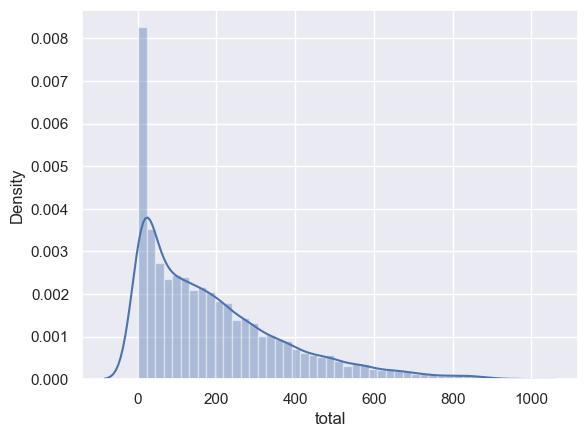

In [42]:
sns.distplot(df[target[0]]);

Samples in train set without outliers: 10586
Number of outliers removed: 300


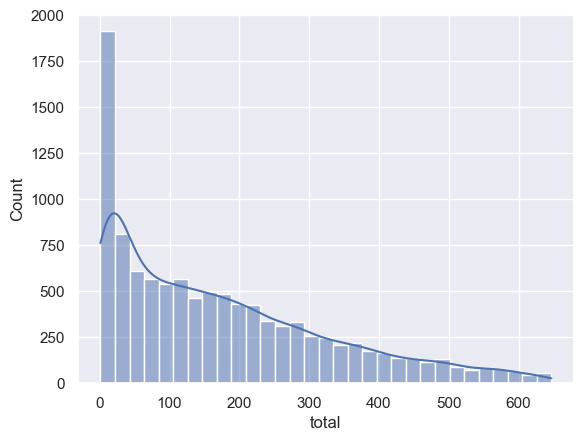

In [43]:
# Calculate IQR and define bounds
q1 = df.total.quantile(0.25)
q3 = df.total.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr) 

# Filter outliers
train_preprocessed = df.loc[(df.total >= lower_bound) & (df.total <= upper_bound)]

print("Samples in train set without outliers: {}".format(len(train_preprocessed)))
print("Number of outliers removed: {}".format(len(df) - len(train_preprocessed)))

# Plot distribution without outliers
sns.histplot(train_preprocessed.total, kde=True);

### Handle Outliers Only in Training: Remove or treat outliers only in the training set and allow the model to encounter outliers in the test set as a true test of its robustness.

In [44]:
#Do two models, for casual and registered, try knn

In [45]:
df

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,datetime_year,datetime_hour,datetime_month,datetime_month_name,datetime_day,datetime_day_name
0,0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,0,1,January,1,Saturday
1,1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,January,1,Saturday
2,2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,2,1,January,1,Saturday
3,3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,3,1,January,1,Saturday
4,4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,4,1,January,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,19,12,December,19,Wednesday
10882,10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,20,12,December,19,Wednesday
10883,10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,21,12,December,19,Wednesday
10884,10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,22,12,December,19,Wednesday


In [46]:
## Feature Engineering

In [47]:
df


,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,datetime_year,datetime_hour,datetime_month,datetime_month_name,datetime_day,datetime_day_name
0,0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,0,1,January,1,Saturday
1,1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,January,1,Saturday
2,2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,2,1,January,1,Saturday
3,3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,3,1,January,1,Saturday
4,4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,4,1,January,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,19,12,December,19,Wednesday
10882,10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,20,12,December,19,Wednesday
10883,10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,21,12,December,19,Wednesday
10884,10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,22,12,December,19,Wednesday


In [48]:
df

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,datetime_year,datetime_hour,datetime_month,datetime_month_name,datetime_day,datetime_day_name
0,0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,0,1,January,1,Saturday
1,1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,January,1,Saturday
2,2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,2,1,January,1,Saturday
3,3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,3,1,January,1,Saturday
4,4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,4,1,January,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,19,12,December,19,Wednesday
10882,10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,20,12,December,19,Wednesday
10883,10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,21,12,December,19,Wednesday
10884,10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,22,12,December,19,Wednesday


In [49]:
X = df.drop(columns=["total", "registered", "atemp"])

In [50]:
X

,index,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,datetime_year,datetime_hour,datetime_month,datetime_month_name,datetime_day,datetime_day_name
0,0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0000,3,2011,0,1,January,1,Saturday
1,1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0000,8,2011,1,1,January,1,Saturday
2,2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0000,5,2011,2,1,January,1,Saturday
3,3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0000,3,2011,3,1,January,1,Saturday
4,4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0000,0,2011,4,1,January,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,10881,2012-12-19 19:00:00,4,0,1,1,15.58,50,26.0027,7,2012,19,12,December,19,Wednesday
10882,10882,2012-12-19 20:00:00,4,0,1,1,14.76,57,15.0013,10,2012,20,12,December,19,Wednesday
10883,10883,2012-12-19 21:00:00,4,0,1,1,13.94,61,15.0013,4,2012,21,12,December,19,Wednesday
10884,10884,2012-12-19 22:00:00,4,0,1,1,13.94,61,6.0032,12,2012,22,12,December,19,Wednesday


In [51]:
y = df["total"]


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [53]:
## Define pipelines one for numerical and one for categorical features

In [54]:

def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x.to_numpy() / period * 2 * np.pi).reshape(-1, 1))

def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x.to_numpy() / period * 2 * np.pi).reshape(-1, 1))


In [55]:
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),
                        MinMaxScaler(), PolynomialFeatures(include_bias=False,degree=2)
)

cat_pipe=make_pipeline(SimpleImputer(strategy='most_frequent'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False)
                      )

In [56]:
class MyTransformer(TransformerMixin, BaseEstimator):
    def __init__(self, column_names, period=1):
        self.column_names = column_names
        self.period =period
        
        
    def sin_transformer(self):
        # No need to call .to_numpy() because the input is already a NumPy array
        return FunctionTransformer(lambda x: np.sin(x / self.period * 2 * np.pi).reshape(-1, 1))

    def cos_transformer(self):
        # No need to call .to_numpy() because the input is already a NumPy array
        return FunctionTransformer(lambda x: np.cos(x / self.period * 2 * np.pi).reshape(-1, 1))


    def fit(self, X, y=None):
        return self  # The fit method typically does nothing for transformers
    
    def transform(self, X):
        X_transformed = X.copy()  
        for column_name in self.column_names:
            # Apply sine transformation directly to the column and store in the new column
            X_transformed[column_name + '_sin'] = self.sin_transformer().fit_transform(X[column_name].values.reshape(-1, 1)).reshape(-1)
            
            # Apply cosine transformation directly to the column and store in the new column
            X_transformed[column_name + '_cos'] = self.cos_transformer().fit_transform(X[column_name].values.reshape(-1, 1)).reshape(-1)
            
            # Example of another transformation - doubling the values in the column
            X_transformed[column_name] = X_transformed[column_name].apply(lambda x: x * 2)
        
        return X_transformed
   


In [57]:
X_train

,index,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,datetime_year,datetime_hour,datetime_month,datetime_month_name,datetime_day,datetime_day_name
2930,2930,2011-07-11 00:00:00,3,0,1,1,28.70,65,12.9980,10,2011,0,7,July,11,Monday
7669,7669,2012-05-18 22:00:00,2,0,1,1,22.96,52,22.0028,57,2012,22,5,May,18,Friday
1346,1346,2011-04-01 23:00:00,2,0,1,1,12.30,61,6.0032,12,2011,23,4,April,1,Friday
9432,9432,2012-09-16 09:00:00,3,0,0,1,23.78,60,8.9981,70,2012,9,9,September,16,Sunday
453,453,2011-02-01 23:00:00,1,0,1,3,8.20,93,12.9980,1,2011,23,2,February,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,5734,2012-01-14 02:00:00,1,0,0,1,6.56,47,11.0014,6,2012,2,1,January,14,Saturday
5191,5191,2011-12-10 09:00:00,4,0,0,1,11.48,61,19.0012,15,2011,9,12,December,10,Saturday
5390,5390,2011-12-18 16:00:00,4,0,0,1,11.48,48,16.9979,27,2011,16,12,December,18,Sunday
860,860,2011-02-19 07:00:00,1,0,0,1,15.58,17,35.0008,6,2011,7,2,February,19,Saturday


In [58]:

feature_transform = ColumnTransformer(
    transformers=[
        ("num", num_pipe, ['temp', 'humidity', 'windspeed']),  # Apply num_pipe to numerical columns
        ("cat", cat_pipe, ['holiday', 'workingday', 'season', 'weather']),  # Apply cat_pipe to categorical columns
        ("custom", MyTransformer(column_names=["datetime_hour"], period=24), ["datetime_hour"])  # Apply MyTransformer to 'time' column
    ],
    remainder="drop"
)

In [59]:
feature_transform.fit(X_train)  

/Users/saramaras/miniconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler()),
                                                 ('polynomialfeatures',
                                                  PolynomialFeatures(include_bias=False))]),
                                 ['temp', 'humidity', 'windspeed']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['holiday', 'workingday', 'season',
                                  'weather']),
                                ('custom',
                                 MyTransformer(column_names=['datetime_hour'],
                                               period=24),
                                 ['datetime_hour'])])

In [60]:
X_train_fe = feature_transform.transform(X_train)  # use this to train your model
X_test_fe = feature_transform.transform(X_test)

In [61]:
X_train_fe    #change column names

,num__temp,num__humidity,num__windspeed,num__temp^2,num__temp humidity,num__temp windspeed,num__humidity^2,num__humidity windspeed,num__windspeed^2,cat__holiday_0,...,cat__season_2,cat__season_3,cat__season_4,cat__weather_1,cat__weather_2,cat__weather_3,cat__weather_4,custom__datetime_hour,custom__datetime_hour_sin,custom__datetime_hour_cos
2930,0.693878,0.65,0.228047,0.481466,0.451020,0.158237,0.4225,0.148231,0.052006,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0.000000,1.000000
7669,0.551020,0.52,0.386035,0.303623,0.286531,0.212713,0.2704,0.200738,0.149023,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,44,-0.500000,0.866025
1346,0.285714,0.61,0.105325,0.081633,0.174286,0.030093,0.3721,0.064248,0.011093,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,46,-0.258819,0.965926
9432,0.571429,0.60,0.157870,0.326531,0.342857,0.090211,0.3600,0.094722,0.024923,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,18,0.707107,-0.707107
453,0.183673,0.93,0.228047,0.033736,0.170816,0.041886,0.8649,0.212084,0.052006,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,46,-0.258819,0.965926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.142857,0.47,0.193018,0.020408,0.067143,0.027574,0.2209,0.090718,0.037256,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4,0.500000,0.866025
5191,0.265306,0.61,0.333373,0.070387,0.161837,0.088446,0.3721,0.203357,0.111137,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,18,0.707107,-0.707107
5390,0.265306,0.48,0.298225,0.070387,0.127347,0.079121,0.2304,0.143148,0.088938,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,32,-0.866025,-0.500000
860,0.367347,0.17,0.614083,0.134944,0.062449,0.225581,0.0289,0.104394,0.377097,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,14,0.965926,-0.258819


In [62]:
linreg = LinearRegression()

In [63]:
linreg.fit(X_train_fe,y_train)

LinearRegression()

In [64]:
y_pred_train=linreg.predict(X_train_fe)
y_pred_test=linreg.predict(X_test_fe)

In [65]:
print('r_2 score train :',r2_score(y_train,y_pred_train))
print('r_2 score test :',r2_score(y_test,y_pred_test))

r_2 score train : 0.46628879994658967
r_2 score test : 0.4541200398683439


In [66]:
## Create a function with different models, add the best hyperparameter

In [67]:
rf = RandomForestRegressor(max_depth=5, random_state=0)
rf.fit(X_train_fe, y_train)

RandomForestRegressor(max_depth=5, random_state=0)

In [68]:
def train_model(X_train_fe, y_train, X_test_fe, y_test):
    
    model_params = {
        
        "LinearRegression": { 
            "model": LinearRegression(),
            "params": { 
            }
        
        },
                             
        "PoissonRegressor":{
            "model": PoissonRegressor(max_iter=1000),
            "params": {
                "alpha": [0.1, 0.5, 1.0, 5.0, 10.0]
            }
        },
            
        "Ridge": {
            "model": Ridge(max_iter=1000, tol=1e-3),
            "params": {
                "alpha": [0.1, 1.0, 10.0, 100.0]
            }
        },
        
        "Lasso": {
            "model": Lasso(max_iter=1000, tol=1e-3),
            "params": {
                
                "alpha":[0.001, 0.01, 0.1, 1.0, 10.0]
            }
        },
        
        "ElasticNet": {
            "model": ElasticNet(max_iter=1000, tol=1e-3),
            "params": {
                "alpha": [0.001, 0.01, 0.1, 1.0],
                "l1_ratio": [0.1, 0.5, 0.7, 1.0]
            }
        },
             'HistGradientBoostingRegressor': {
            'model': HistGradientBoostingRegressor(),
            'params': {
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 5, 10],
                'min_samples_leaf': [10, 20, 30]
            }
        },
        'RandomForestRegressor': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50, 100, 200],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10]
            }
        }
    }
            
            
    
  
    
    results = {}
    
    for model_name, model_info in model_params.items():
        
        grid_search = GridSearchCV(model_info["model"], model_info["params"], cv=3, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train_fe, y_train)
       
        results[model_name] = {
            "best_model": grid_search.best_estimator_,
            "best_score": grid_search.best_score_,
            "best_params": grid_search.best_params_
        }
        
        
        
    return results

In [69]:
results = train_model(X_train_fe, y_train, X_test_fe, y_test)

/Users/saramaras/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_glm/glm.py:282: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/Users/saramaras/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_glm/glm.py:282: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
/Users/saramaras/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_glm/glm.py:282: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the

In [70]:
results

{'LinearRegression': {'best_model': LinearRegression(),
  'best_score': 0.464486843837795,
  'best_params': {}},
 'PoissonRegressor': {'best_model': PoissonRegressor(alpha=0.1, max_iter=1000),
  'best_score': 0.44089929505595055,
  'best_params': {'alpha': 0.1}},
 'Ridge': {'best_model': Ridge(alpha=0.1, max_iter=1000, tol=0.001),
  'best_score': 0.46446712810997015,
  'best_params': {'alpha': 0.1}},
 'Lasso': {'best_model': Lasso(alpha=0.001, tol=0.001),
  'best_score': 0.4644858114014168,
  'best_params': {'alpha': 0.001}},
 'ElasticNet': {'best_model': ElasticNet(alpha=0.001, l1_ratio=1.0, tol=0.001),
  'best_score': 0.4644858114014168,
  'best_params': {'alpha': 0.001, 'l1_ratio': 1.0}},
 'HistGradientBoostingRegressor': {'best_model': HistGradientBoostingRegressor(max_depth=10, min_samples_leaf=10),
  'best_score': 0.8461255458054545,
  'best_params': {'learning_rate': 0.1,
   'max_depth': 10,
   'min_samples_leaf': 10}},
 'RandomForestRegressor': {'best_model': RandomForestRegres

In [71]:
results_df = pd.DataFrame(results)
results_df

,LinearRegression,PoissonRegressor,Ridge,Lasso,ElasticNet,HistGradientBoostingRegressor,RandomForestRegressor
best_model,LinearRegression(),"PoissonRegressor(alpha=0.1, max_iter=1000)","Ridge(alpha=0.1, max_iter=1000, tol=0.001)","Lasso(alpha=0.001, tol=0.001)","ElasticNet(alpha=0.001, l1_ratio=1.0, tol=0.001)","HistGradientBoostingRegressor(max_depth=10, mi...","(DecisionTreeRegressor(max_depth=20, max_featu..."
best_score,0.464487,0.440899,0.464467,0.464486,0.464486,0.846126,0.836102
best_params,{},{'alpha': 0.1},{'alpha': 0.1},{'alpha': 0.001},"{'alpha': 0.001, 'l1_ratio': 1.0}","{'learning_rate': 0.1, 'max_depth': 10, 'min_s...","{'max_depth': 20, 'min_samples_split': 10, 'n_..."


In [72]:
results.keys()

dict_keys(['LinearRegression', 'PoissonRegressor', 'Ridge', 'Lasso', 'ElasticNet', 'HistGradientBoostingRegressor', 'RandomForestRegressor'])

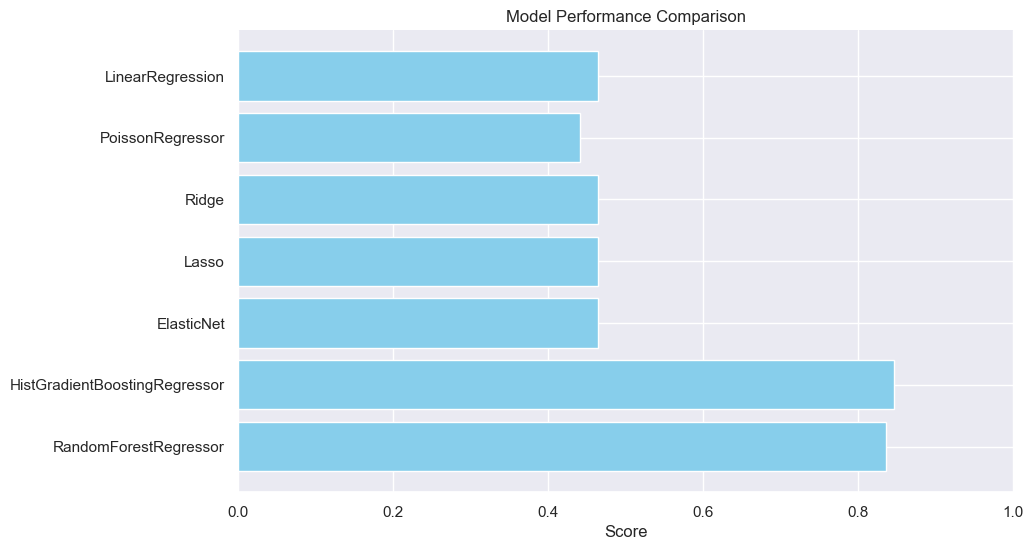

In [73]:
# Extract model names and scores
model_names = list(results.keys())
scores = [results[model]["best_score"] for model in model_names]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(model_names, scores, color='skyblue')
plt.xlabel('Score')
plt.title('Model Performance Comparison')
plt.xlim([0, 1.0])
plt.gca().invert_yaxis()  # Optional: invert y-axis for descending order
sns.despine()

In [74]:
results

{'LinearRegression': {'best_model': LinearRegression(),
  'best_score': 0.464486843837795,
  'best_params': {}},
 'PoissonRegressor': {'best_model': PoissonRegressor(alpha=0.1, max_iter=1000),
  'best_score': 0.44089929505595055,
  'best_params': {'alpha': 0.1}},
 'Ridge': {'best_model': Ridge(alpha=0.1, max_iter=1000, tol=0.001),
  'best_score': 0.46446712810997015,
  'best_params': {'alpha': 0.1}},
 'Lasso': {'best_model': Lasso(alpha=0.001, tol=0.001),
  'best_score': 0.4644858114014168,
  'best_params': {'alpha': 0.001}},
 'ElasticNet': {'best_model': ElasticNet(alpha=0.001, l1_ratio=1.0, tol=0.001),
  'best_score': 0.4644858114014168,
  'best_params': {'alpha': 0.001, 'l1_ratio': 1.0}},
 'HistGradientBoostingRegressor': {'best_model': HistGradientBoostingRegressor(max_depth=10, min_samples_leaf=10),
  'best_score': 0.8461255458054545,
  'best_params': {'learning_rate': 0.1,
   'max_depth': 10,
   'min_samples_leaf': 10}},
 'RandomForestRegressor': {'best_model': RandomForestRegres

In [75]:
#Iterate through dict

In [76]:
results

{'LinearRegression': {'best_model': LinearRegression(),
  'best_score': 0.464486843837795,
  'best_params': {}},
 'PoissonRegressor': {'best_model': PoissonRegressor(alpha=0.1, max_iter=1000),
  'best_score': 0.44089929505595055,
  'best_params': {'alpha': 0.1}},
 'Ridge': {'best_model': Ridge(alpha=0.1, max_iter=1000, tol=0.001),
  'best_score': 0.46446712810997015,
  'best_params': {'alpha': 0.1}},
 'Lasso': {'best_model': Lasso(alpha=0.001, tol=0.001),
  'best_score': 0.4644858114014168,
  'best_params': {'alpha': 0.001}},
 'ElasticNet': {'best_model': ElasticNet(alpha=0.001, l1_ratio=1.0, tol=0.001),
  'best_score': 0.4644858114014168,
  'best_params': {'alpha': 0.001, 'l1_ratio': 1.0}},
 'HistGradientBoostingRegressor': {'best_model': HistGradientBoostingRegressor(max_depth=10, min_samples_leaf=10),
  'best_score': 0.8461255458054545,
  'best_params': {'learning_rate': 0.1,
   'max_depth': 10,
   'min_samples_leaf': 10}},
 'RandomForestRegressor': {'best_model': RandomForestRegres

In [77]:
shap_values_dict = {}

for model_name, model_info in results.items():
    best_model = model_info["best_model"]
    
    
    if isinstance(best_model, (RandomForestRegressor, 
                               HistGradientBoostingRegressor)):
                  
                  explainer = shap.Explainer(best_model, X_test_fe) 
                  shap_values = explainer.shap_values(X_test_fe, check_additivity=False)
                  
    else:
                   
                  explainer = shap.Explainer(best_model, X_test_fe) 
                  shap_values = explainer.shap_values(X_test_fe)
                  
                  
                  
                  
                  
    shap_values_dict[model_name] = shap_values


100%|===================| 2716/2722 [02:20<00:00]        

In [78]:
shap_values_dict.keys()

dict_keys(['LinearRegression', 'PoissonRegressor', 'Ridge', 'Lasso', 'ElasticNet', 'HistGradientBoostingRegressor', 'RandomForestRegressor'])

In [79]:
X_test_fe

,num__temp,num__humidity,num__windspeed,num__temp^2,num__temp humidity,num__temp windspeed,num__humidity^2,num__humidity windspeed,num__windspeed^2,cat__holiday_0,...,cat__season_2,cat__season_3,cat__season_4,cat__weather_1,cat__weather_2,cat__weather_3,cat__weather_4,custom__datetime_hour,custom__datetime_hour_sin,custom__datetime_hour_cos
3133,0.816327,0.59,0.000000,0.666389,0.481633,0.000000,0.3481,0.000000,0.000000,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,22,2.588190e-01,-9.659258e-01
5786,0.081633,0.54,0.105325,0.006664,0.044082,0.008598,0.2916,0.056876,0.011093,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12,1.000000e+00,6.123234e-17
5224,0.224490,0.48,0.228047,0.050396,0.107755,0.051194,0.2304,0.109463,0.052006,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,36,-1.000000e+00,-1.836970e-16
8953,0.714286,0.62,0.228047,0.510204,0.442857,0.162891,0.3844,0.141389,0.052006,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,20,5.000000e-01,-8.660254e-01
8054,0.612245,0.53,0.298225,0.374844,0.324490,0.182587,0.2809,0.158059,0.088938,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,46,-2.588190e-01,9.659258e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,0.489796,0.29,0.491243,0.239900,0.142041,0.240609,0.0841,0.142460,0.241319,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,30,-7.071068e-01,-7.071068e-01
5605,0.387755,0.37,0.350888,0.150354,0.143469,0.136058,0.1369,0.129828,0.123122,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,32,-8.660254e-01,-5.000000e-01
2935,0.653061,0.74,0.157870,0.426489,0.483265,0.103099,0.5476,0.116824,0.024923,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,10,9.659258e-01,2.588190e-01
3058,0.653061,0.65,0.193018,0.426489,0.424490,0.126052,0.4225,0.125461,0.037256,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,16,8.660254e-01,-5.000000e-01


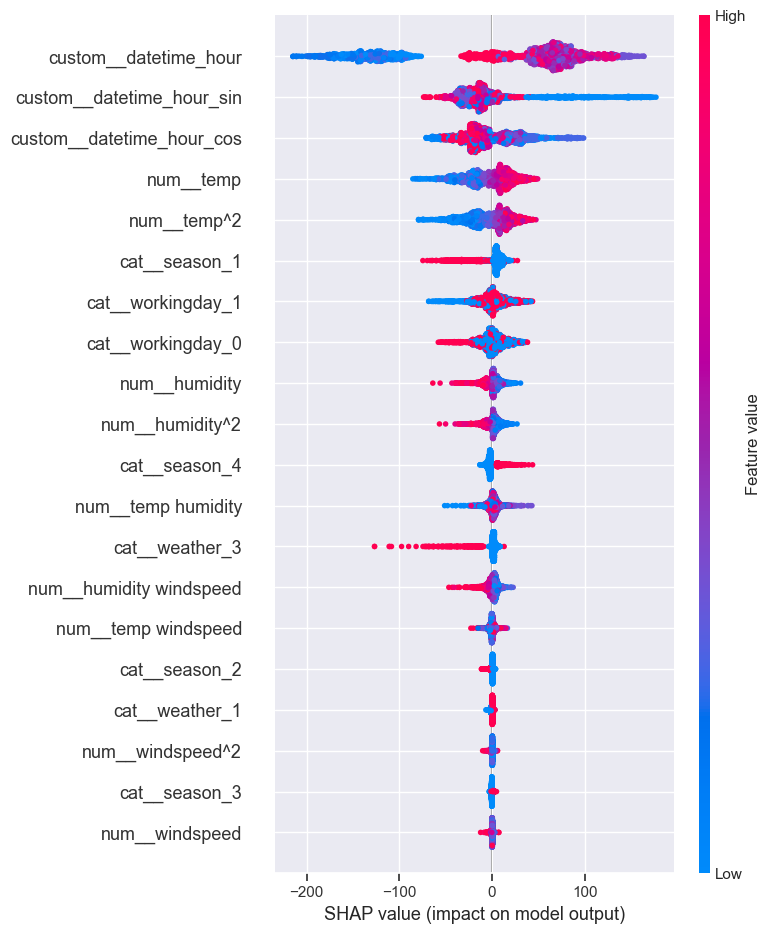

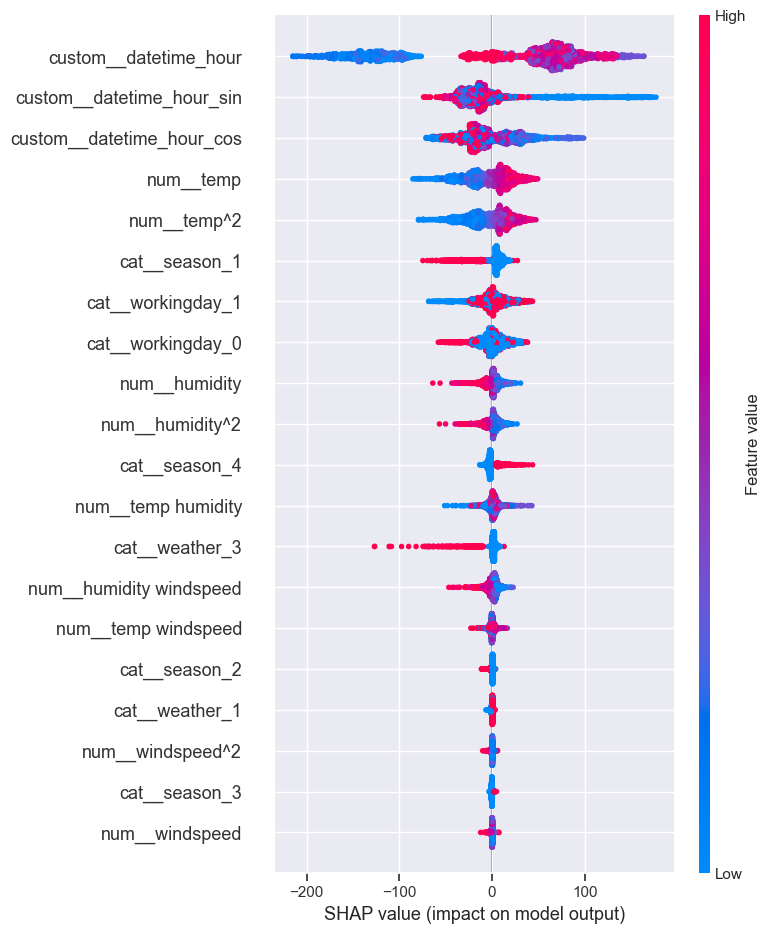

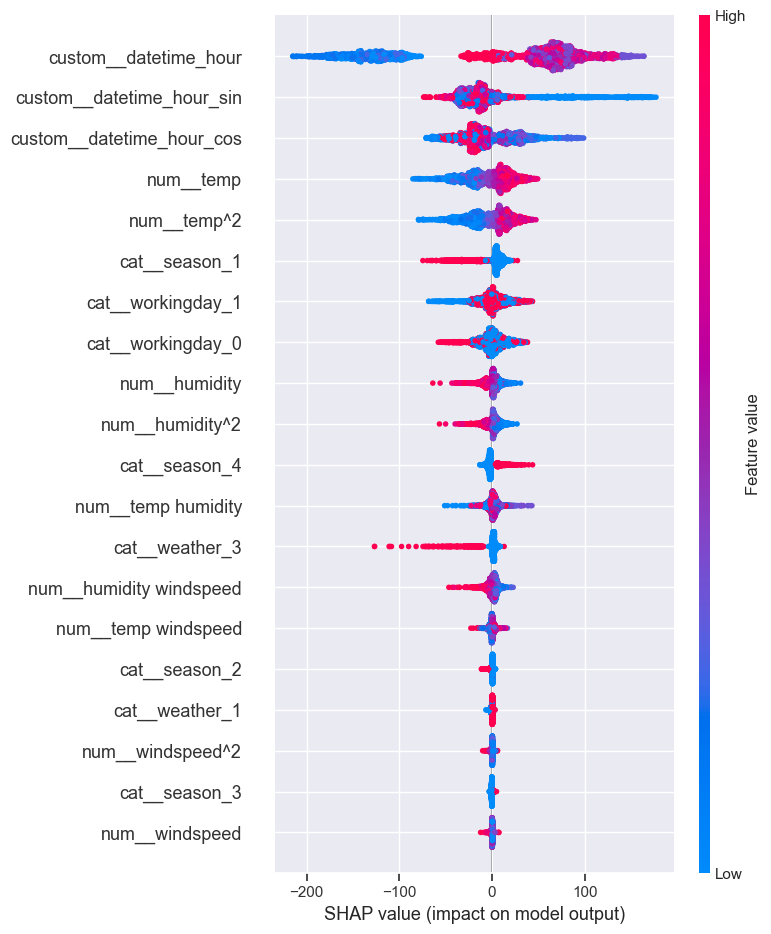

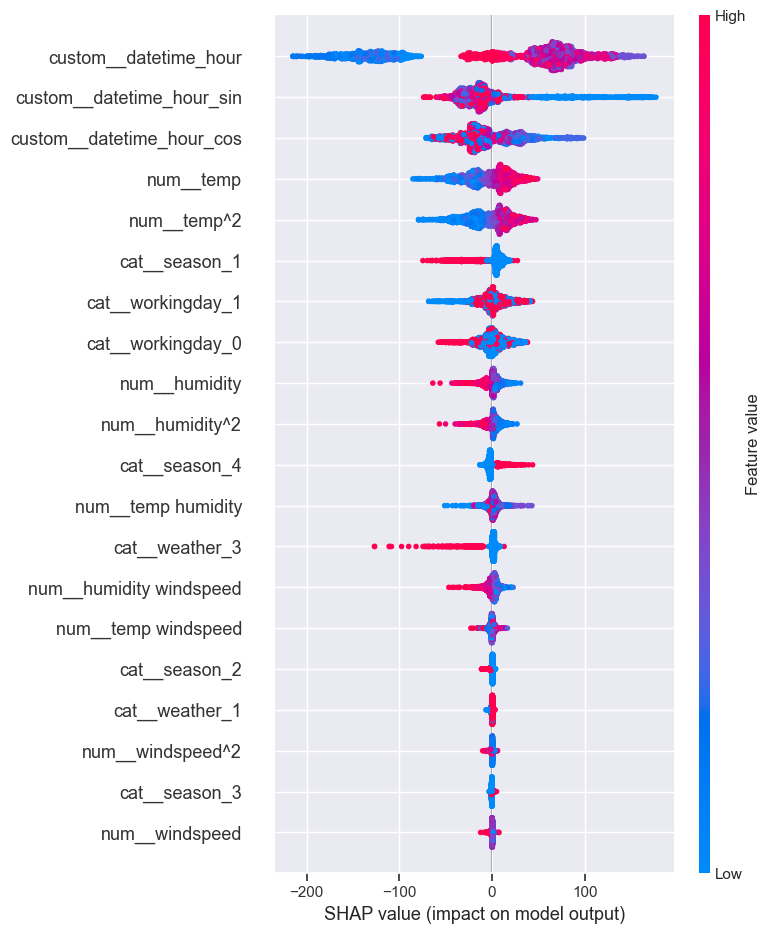

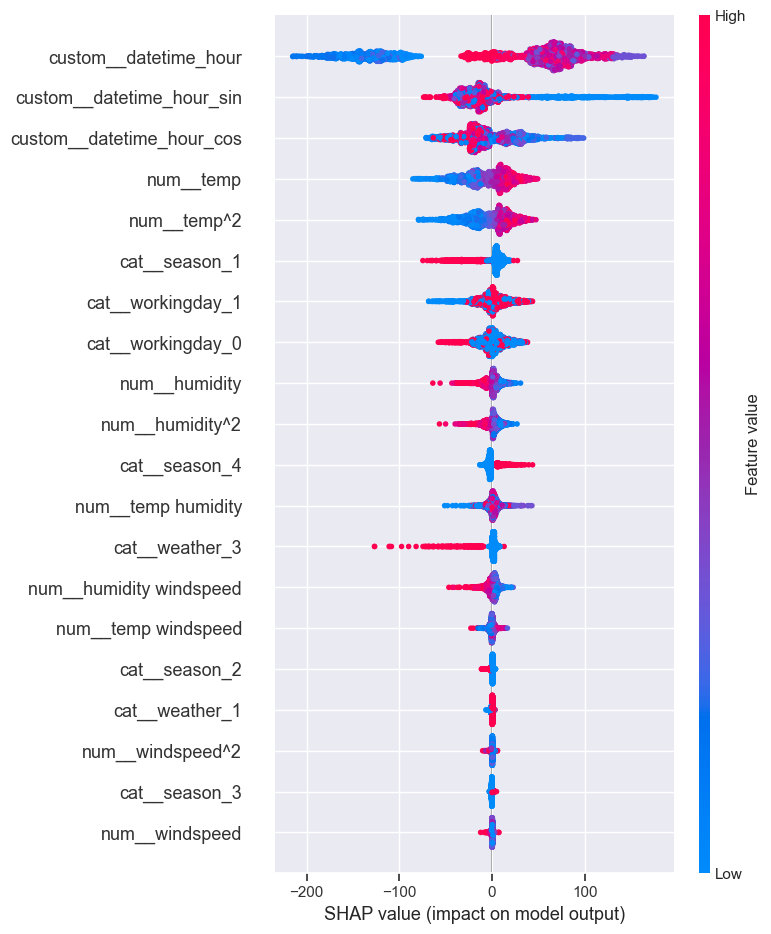

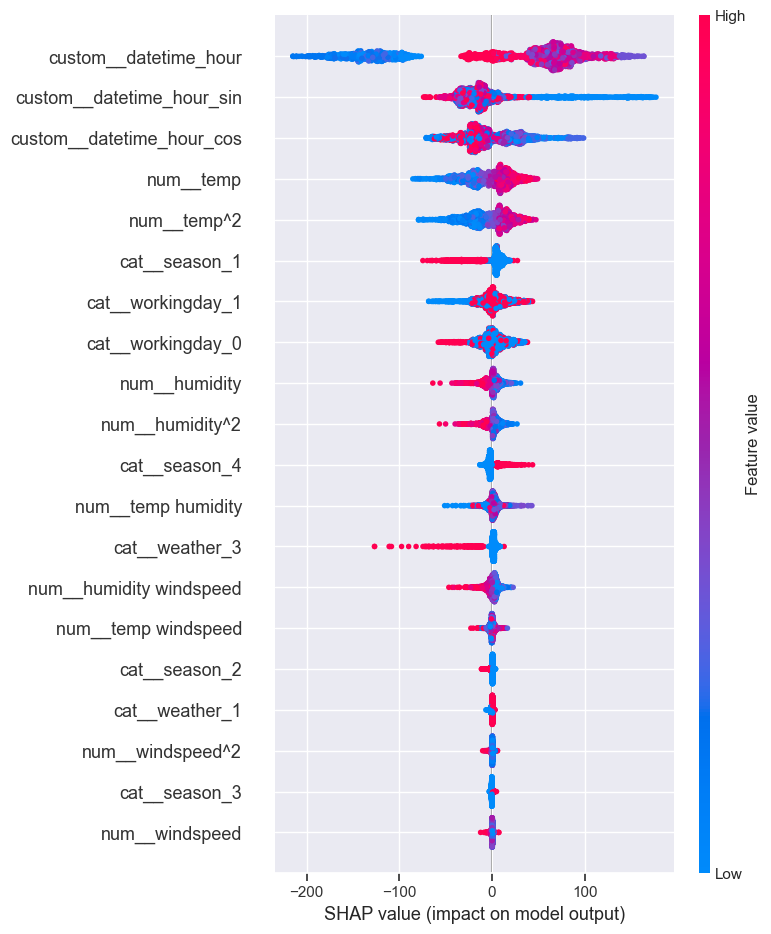

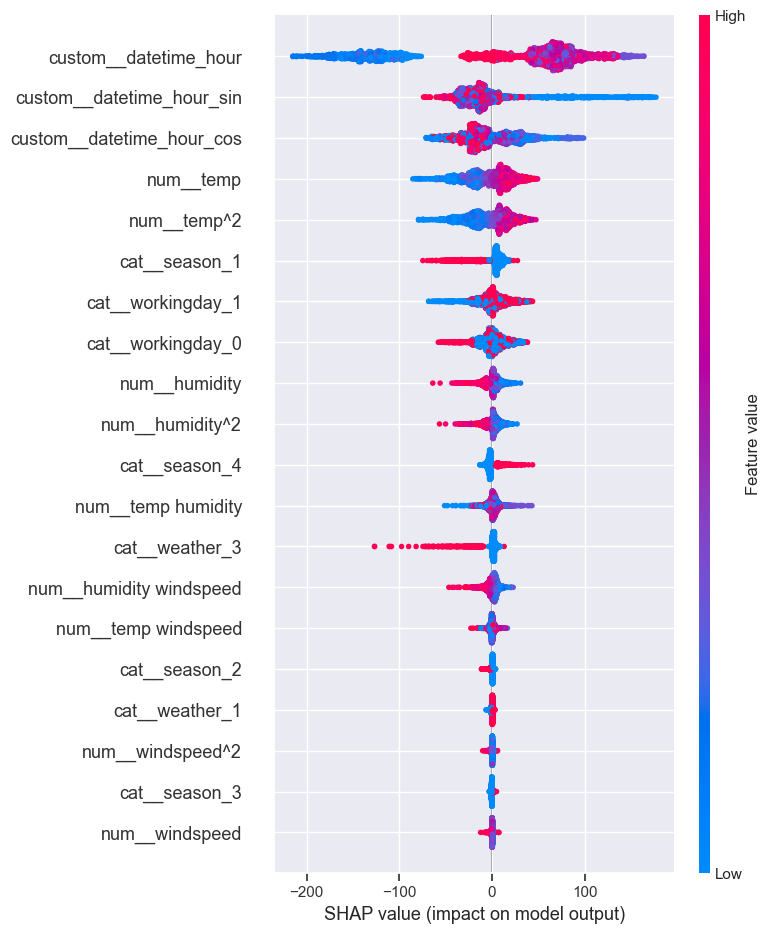

In [80]:
for model in shap_values_dict.keys():
    shap_values = shap_values_dict[model_name] 
    shap.summary_plot(shap_values, X_test_fe)
   


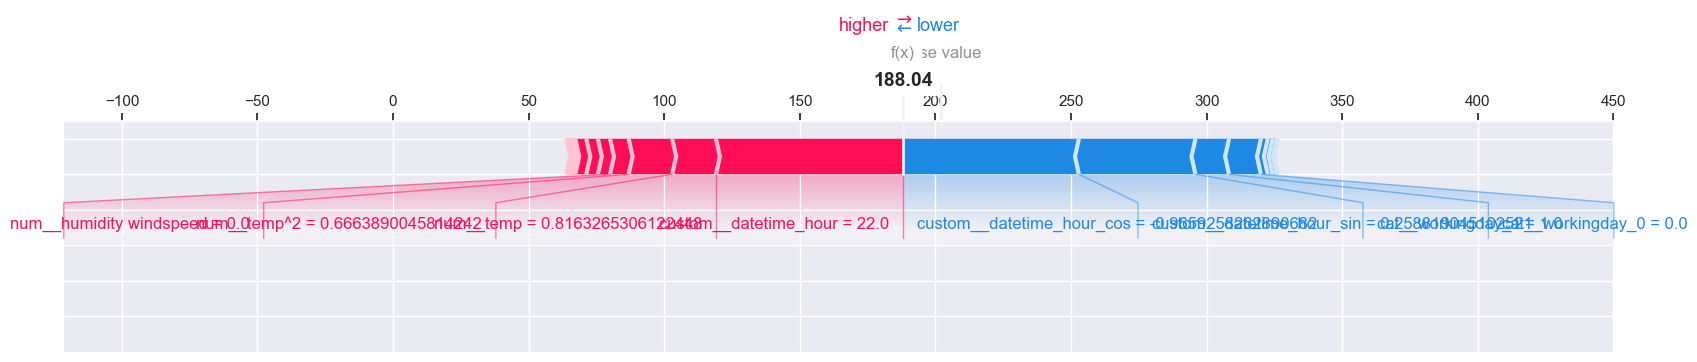

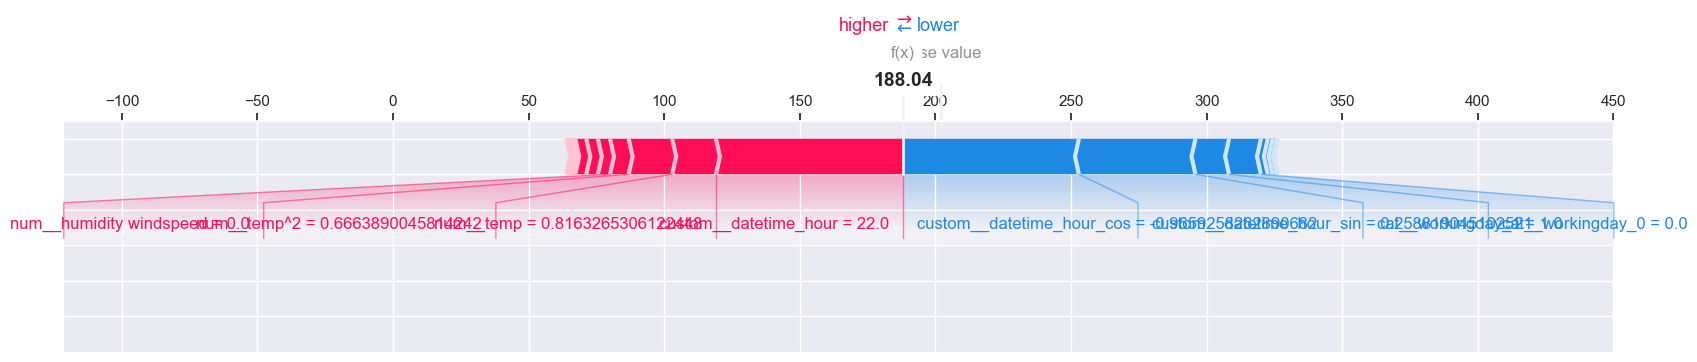

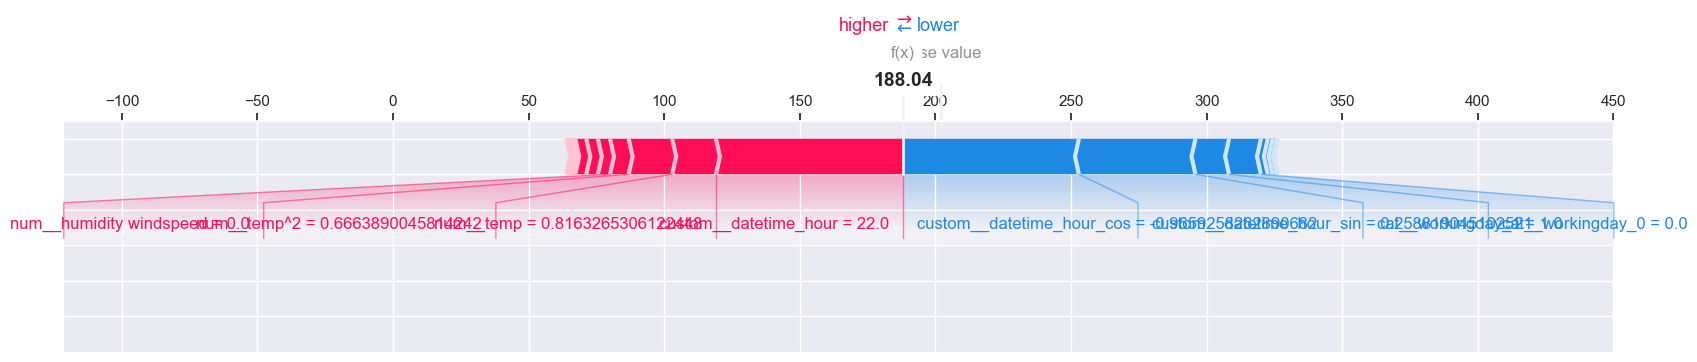

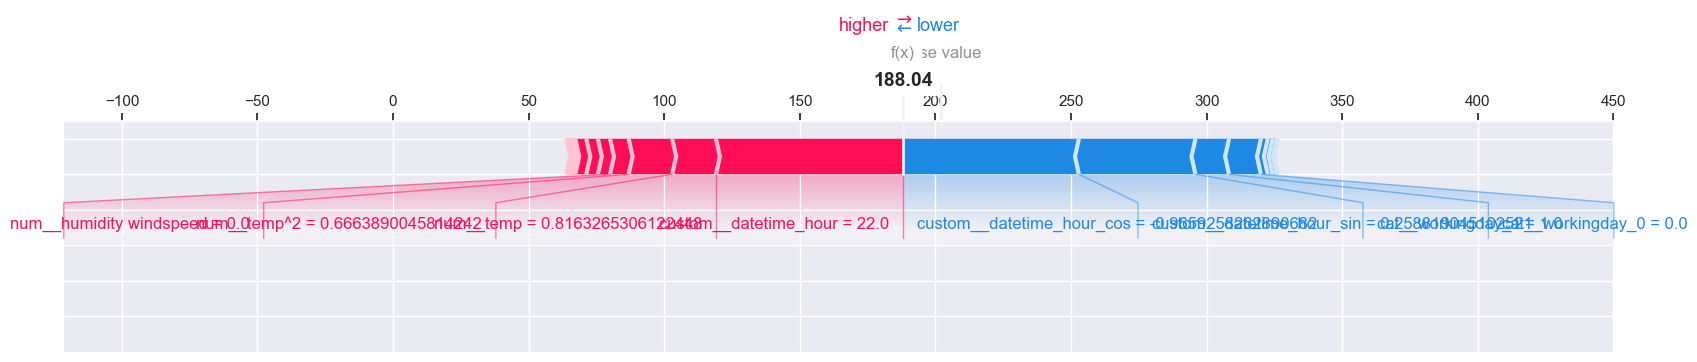

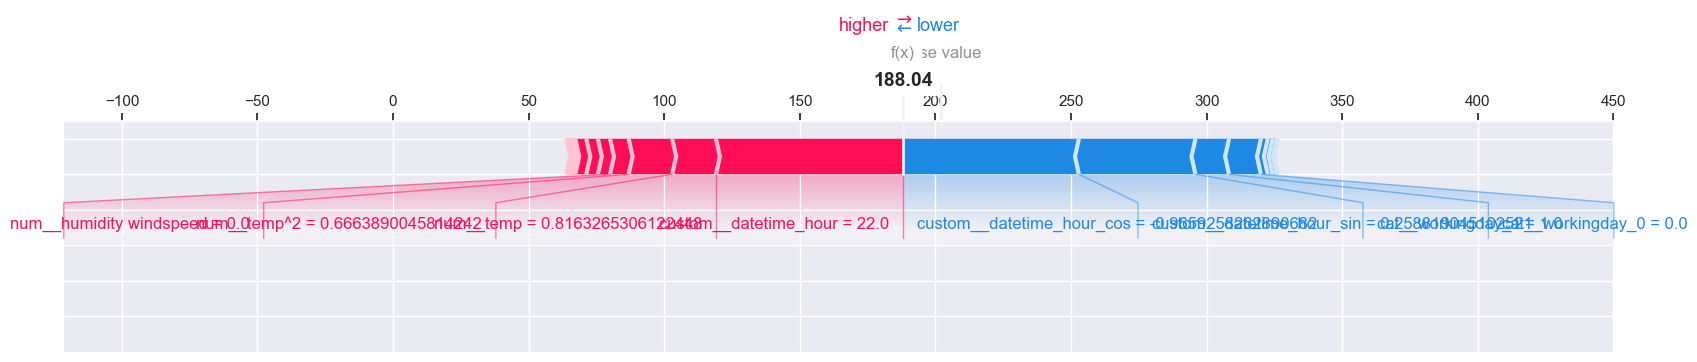

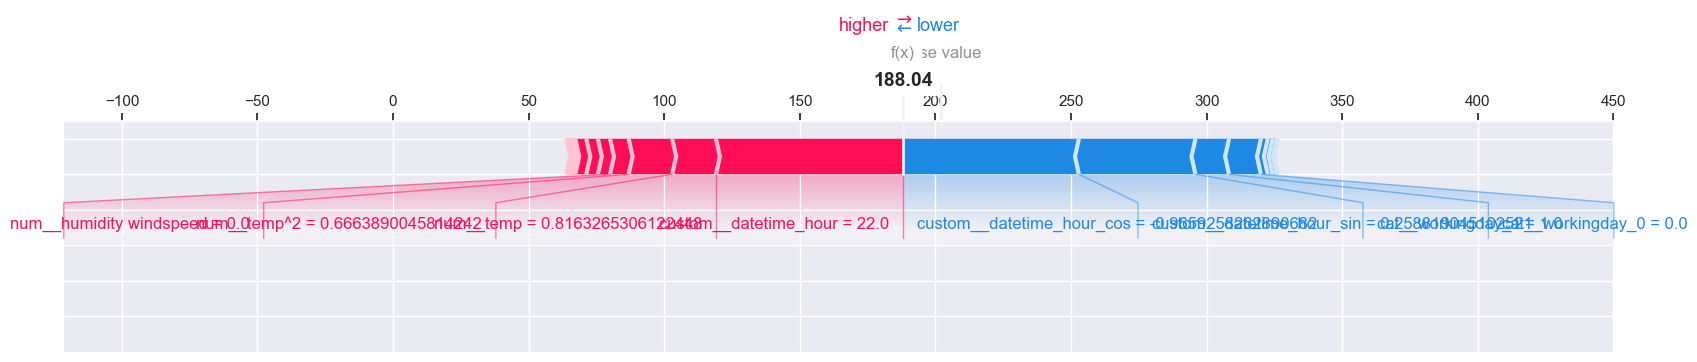

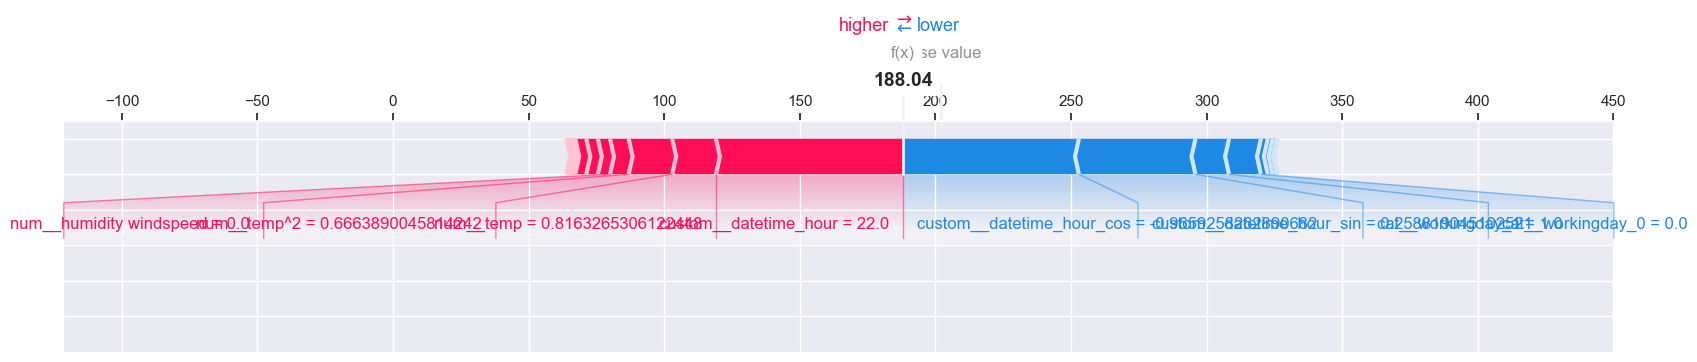

In [83]:
for model in shap_values_dict.keys():
    shap_values = shap_values_dict[model_name] 
    shap.plots.force(explainer.expected_value, shap_values[0], X_test_fe.iloc[0, :], matplotlib = True)
    

SyntaxError: incomplete input (1588176201.py, line 1)